In [5]:
import os
import numpy as np
import quandl as qd
import pandas as pd
import pandas_datareader as pdr
from tiingo import TiingoClient
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [6]:
## #1 - Collecting the Data
#S&P 500
config = {}
config['session'] = True
config['api_key'] = "4b8ce6e58cd5d094aec3781e5217c7e5ea6ac675"
client = TiingoClient(config)
json_sp = client.get_ticker_price("SPY",fmt='json',startDate='2017-01-01',endDate='2017-12-31',frequency='daily')
sp500=pd.DataFrame(json_sp)
sp500.index=pd.to_datetime(sp500['date'].str[0:10])
#Amazon
amazon=pdr.DataReader('AMZN','quandl','2017-01-01','2017-12-31')
amazon.index=pd.to_datetime(amazon.index)
amazon=amazon.sort_index()
#Oil
df_oil=qd.get("OPEC/ORB", start_date="2017-01-01", end_date="2017-12-31")
df_oil.columns=['Close']
#Bitcoin
BTC_Price = qd.get("BITSTAMP/USD",start_date="2017-01-01",end_date="2017-12-31")
#Gold
gold_data = qd.get("LBMA/GOLD",authtoken="SDHymRm8BB-GzdG7ygiJ",start_date = "2017-01-01", end_date = "2017-12-31")
gold_data = gold_data[['USD (PM)']]
#Treasury
treasurydata = qd.get("USTREASURY/REALYIELD", authtoken="-Pv7h-p1KSY8D6QsQfJv", start_date="2017-01-01", end_date="2017-12-31")
treasurydata.index=pd.to_datetime(treasurydata.index)

In [7]:
print('S&P 500 Count:',sp500['open'].count())
sp500.head(5)

S&P 500 Count: 251


,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,date,divCash,high,low,open,splitFactor,volume
date,,,,,,,,,,,,,
2017-01-03,220.073485,220.649952,218.748296,219.878073,91366522,225.24,2017-01-03T00:00:00.000Z,0.0,225.8300,223.8837,225.04,1.0,91366522
2017-01-04,221.382748,221.548849,220.434998,220.444769,78744433,226.58,2017-01-04T00:00:00.000Z,0.0,226.7500,225.6100,225.62,1.0,78744433
2017-01-05,221.206877,221.382748,220.307980,221.079859,78379012,226.40,2017-01-05T00:00:00.000Z,0.0,226.5800,225.4800,226.27,1.0,78379012
2017-01-06,221.998298,222.525911,220.718346,221.333895,71559922,227.21,2017-01-06T00:00:00.000Z,0.0,227.7500,225.9000,226.53,1.0,71559922
2017-01-09,221.265501,221.861607,221.222803,221.705179,46939676,226.46,2017-01-09T00:00:00.000Z,0.0,227.0701,226.4163,226.91,1.0,46939676


In [8]:
print('Amazon Count:',amazon['Open'].count())
amazon.head(5)

Amazon Count: 249


,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-01-03,757.92,758.7595,747.7000,753.67,3521066.0,0.0,1.0,757.92,758.7595,747.7000,753.67,3521066.0
2017-01-04,758.39,759.6800,754.2000,757.18,2510526.0,0.0,1.0,758.39,759.6800,754.2000,757.18,2510526.0
2017-01-05,761.55,782.3999,760.2557,780.45,5830068.0,0.0,1.0,761.55,782.3999,760.2557,780.45,5830068.0
2017-01-06,782.36,799.4400,778.4800,795.99,5986234.0,0.0,1.0,782.36,799.4400,778.4800,795.99,5986234.0
2017-01-09,798.00,801.7742,791.7700,796.92,3446109.0,0.0,1.0,798.00,801.7742,791.7700,796.92,3446109.0


In [9]:
print('Oil Count:',df_oil.Close.count())
df_oil.head(5)

Oil Count: 257


,Close
Date,
2017-01-03,53.13
2017-01-04,52.71
2017-01-05,53.02
2017-01-06,53.50
2017-01-09,52.85


In [10]:
print('Bitcoin Count:',BTC_Price.High.count())
BTC_Price.head()
df_btc = pd.DataFrame()
df_btc['Close'] = BTC_Price.Last
df_btc.head(5)

Bitcoin Count: 363


,Close
Date,
2017-01-01,966.30
2017-01-02,997.80
2017-01-03,1011.51
2017-01-04,1035.74
2017-01-05,1114.00


In [11]:
print("Gold Count:\n",gold_data['USD (PM)'].count(),sep='')
gold_data.head(5)

Gold Count:
250


,USD (PM)
Date,
2017-01-03,1151.00
2017-01-04,1164.25
2017-01-05,1176.70
2017-01-06,1175.85
2017-01-09,1178.50


In [12]:
print("Treasury Bond Count:\n",treasurydata['5 YR'].count(),sep='')
treasurydata.head(5)

Treasury Bond Count:
250


,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,
2017-01-03,0.08,0.30,0.47,0.78,0.94
2017-01-04,0.08,0.30,0.47,0.78,0.95
2017-01-05,0.03,0.26,0.42,0.73,0.89
2017-01-06,0.08,0.30,0.46,0.76,0.93
2017-01-09,0.04,0.26,0.43,0.74,0.91


In [13]:
## #2 - Processing the Data
print('S&P 500\nCount:',sp500['close'].count())
sp500=pd.DataFrame(sp500['close'],index=sp500.index)
sp500['% Change']=sp500.pct_change()*100
sp500.head(5)

S&P 500
Count: 251


,close,% Change
date,,
2017-01-03,225.24,NaN
2017-01-04,226.58,0.594921
2017-01-05,226.40,-0.079442
2017-01-06,227.21,0.357774
2017-01-09,226.46,-0.330091


count    250.000000
mean       0.068747
std        0.425111
min       -1.774409
25%       -0.125437
50%        0.049867
75%        0.249785
max        1.399755
Name: % Change, dtype: float64

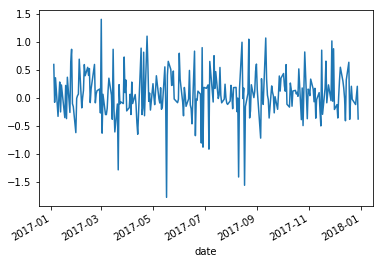

In [14]:
sp500['% Change'].plot()
sp500['% Change'].describe()

In [15]:
print('Amazon\nCount:',amazon['Open'].count())
amazon=pd.DataFrame(amazon['Close'],index=amazon.index)
amazon['% Change']=amazon.pct_change()*100
amazon.head(5)

Amazon
Count: 249


,Close,% Change
Date,,
2017-01-03,753.67,NaN
2017-01-04,757.18,0.465721
2017-01-05,780.45,3.073245
2017-01-06,795.99,1.991159
2017-01-09,796.92,0.116836


count    248.000000
mean       0.185828
std        1.327613
min       -3.541877
25%       -0.403632
50%        0.156986
75%        0.856098
max       13.216375
Name: % Change, dtype: float64

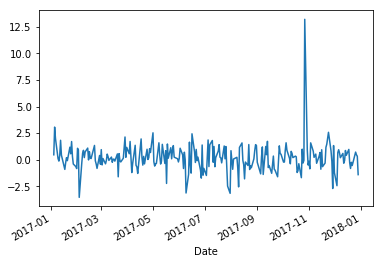

In [16]:
amazon['% Change'].plot()
amazon['% Change'].describe()

In [17]:
print('Oil\nCount:',df_oil.Close.count())
df_oil=pd.DataFrame(df_oil['Close'],index=df_oil.index)
df_oil['% Change']=df_oil.pct_change()*100
df_oil.head(5)

Oil
Count: 257


,Close,% Change
Date,,
2017-01-03,53.13,NaN
2017-01-04,52.71,-0.790514
2017-01-05,53.02,0.588124
2017-01-06,53.50,0.905319
2017-01-09,52.85,-1.214953


,Close,% Change
count,256.000000,256.000000
mean,52.426875,0.082962
std,5.013231,1.215737
min,42.580000,-3.549061
25%,49.177500,-0.743759
50%,52.090000,0.137387
75%,54.552500,0.878861
max,64.470000,3.374973


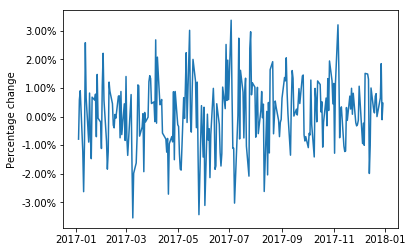

In [18]:
fig, ax = plt.subplots(1, 1)
plt.plot(df_oil.index,df_oil['% Change'])
plt.ylabel('Percentage change')
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.2f}%'.format))
df_oil=df_oil.dropna(subset=['% Change'], how="all")
df_oil.describe()

In [19]:
print('Bitcoin\nCount:',df_btc.Close.count())
df_btc=pd.DataFrame(df_btc['Close'],index=df_btc.index)
df_btc['BTC_PChange']=df_btc.pct_change()*100
df_btc.head(5)

Bitcoin
Count: 363


,Close,BTC_PChange
Date,,
2017-01-01,966.30,NaN
2017-01-02,997.80,3.259857
2017-01-03,1011.51,1.374023
2017-01-04,1035.74,2.395429
2017-01-05,1114.00,7.555950


,Close,BTC_PChange
count,363.000000,362.000000
mean,3950.876501,0.828602
std,3947.969260,4.843991
min,778.620000,-15.732703
25%,1194.885000,-1.306653
50%,2562.530000,0.861615
75%,4533.695000,3.257457
max,19204.870000,24.680636


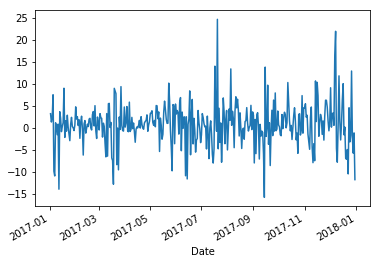

In [20]:
df_btc.BTC_PChange.plot()
df_btc.describe()

In [21]:
gold_change = gold_data.pct_change()*100
gold_change.head(5)

,USD (PM)
Date,
2017-01-03,NaN
2017-01-04,1.151173
2017-01-05,1.069358
2017-01-06,-0.072236
2017-01-09,0.225369


,USD (PM)
count,250.000000
mean,1257.145400
std,34.380023
min,1151.000000
25%,1234.812500
50%,1258.425000
75%,1280.150000
max,1346.250000


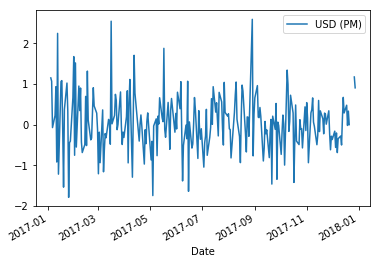

In [22]:
gold_change.plot()
gold_data.describe()

In [23]:
ser_td = pd.Series()
ser_td = treasurydata['10 YR']
ser_td_diff = ser_td.pct_change()*100
ser_td_data = ser_td_diff.reset_index(name = '%change')
ser_td_data.index=ser_td_data['Date']
ser_td_data=pd.DataFrame(ser_td_data['%change'])
ser_td_data.head(5)

,%change
Date,
2017-01-03,NaN
2017-01-04,0.000000
2017-01-05,-10.638298
2017-01-06,9.523810
2017-01-09,-6.521739


,%change
count,249.000000
mean,0.217564
std,7.042737
min,-18.918919
25%,-4.545455
50%,0.000000
75%,5.172414
max,26.470588


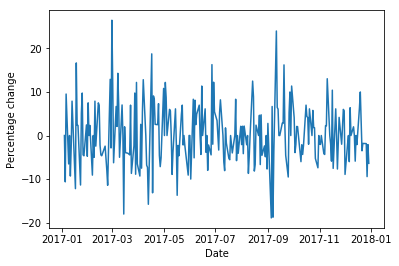

In [24]:
plt.plot(ser_td_data.index,ser_td_data['%change'])
plt.xlabel('Date')
plt.ylabel('Percentage change')
ser_td_data.describe()

In [25]:
## #3 - Regression Analysis
# merging all data into 1 DataFrame & drop NaN 
merge = pd.DataFrame()
merge['S&P 500 - % Change']=sp500['% Change']
merge['Amazon - % Change']=amazon['% Change']
merge['Oil - % Change']=df_oil['% Change']
merge['Bitcoin - % Change']=df_btc['BTC_PChange']
merge['Gold - % Change']=gold_change['USD (PM)']
merge['Treasury - % Change']=ser_td_data['%change']
#input % change as new column - Gold
#input % change as new column - (Ruchi)
merge=merge.dropna()
rows=merge['S&P 500 - % Change'].count()
rows

239

In [26]:
merge

,S&P 500 - % Change,Amazon - % Change,Oil - % Change,Bitcoin - % Change,Gold - % Change,Treasury - % Change
date,,,,,,
2017-01-04,0.594921,0.465721,-0.790514,2.395429,1.151173,0.000000
2017-01-05,-0.079442,3.073245,0.588124,7.555950,1.069358,-10.638298
2017-01-06,0.357774,1.991159,0.905319,-9.807899,-0.072236,9.523810
2017-01-09,-0.330091,0.116836,-1.214953,0.397263,0.225369,-6.521739
2017-01-10,0.000000,-0.127993,-2.630085,-1.506925,0.933390,0.000000
2017-01-11,0.282611,0.392009,-0.932763,0.891652,-0.920555,-9.302326
2017-01-12,-0.250991,1.829741,2.589251,-13.877091,2.248526,-2.564103
2017-01-13,0.229550,0.430166,0.650096,3.705273,-1.219866,7.894737
2017-01-17,-0.352345,-0.908045,0.824228,1.204585,1.084788,-12.195122


Amazon vs. S&P 500
Y-intercept = [0.04604885]
Coefficient = [[0.12914962]]
R-squared = 0.16051430374489484
Mean Squared Error = 1.5066980836525892


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


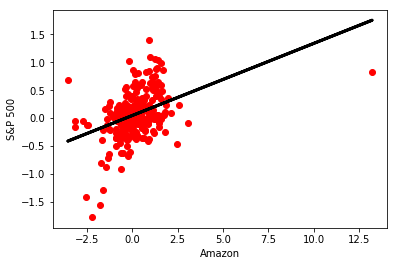

In [27]:
# Amazon
reg = linear_model.LinearRegression()
x_amazon=np.array([merge['Amazon - % Change']]).reshape((rows,1))
y_sp500=np.array([merge['S&P 500 - % Change']]).reshape((rows,1))
reg.fit(x_amazon,y_sp500)
plt.scatter(x_amazon,y_sp500,color='red')
plt.plot(x_amazon,reg.predict(x_amazon),color='black',linewidth=3)
plt.subplot().set_xlabel('Amazon')
plt.subplot().set_ylabel('S&P 500')
print('Amazon vs. S&P 500\nY-intercept = ',reg.intercept_,'\n',
'Coefficient = ',reg.coef_,'\n',
'R-squared = ',reg.score(x_amazon,y_sp500),'\n',
'Mean Squared Error = ',mean_squared_error(x_amazon,y_sp500), sep='')

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Oil vs. S&P 500
Y-intercept = [0.06711704]
Coefficient = [[0.01619891]]
R-squared = 0.0021433350817648966
Mean Squared Error = 1.636642539887035


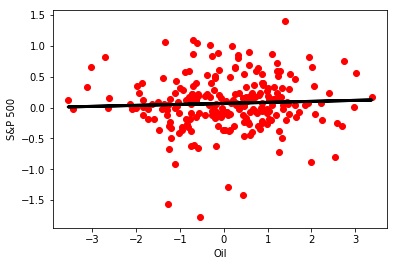

In [28]:
# Oil
reg = linear_model.LinearRegression()
x_oil=np.array([merge['Oil - % Change']]).reshape((rows,1))
y_sp500=np.array([merge['S&P 500 - % Change']]).reshape((rows,1))
reg.fit(x_oil,y_sp500)
plt.scatter(x_oil,y_sp500,color='red')
plt.plot(x_oil,reg.predict(x_oil),color='black',linewidth=3)
plt.subplot().set_xlabel('Oil')
plt.subplot().set_ylabel('S&P 500')
print('Oil vs. S&P 500\nY-intercept = ',reg.intercept_,'\n',
'Coefficient = ',reg.coef_,'\n',
'R-squared = ',reg.score(x_oil,y_sp500),'\n',
'Mean Squared Error = ',mean_squared_error(x_oil,y_sp500), sep='')

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Bitcoin vs. S&P 500
Y-intercept = [0.06745738]
Coefficient = [[0.0007743]]
R-squared = 8.352670979883126e-05
Mean Squared Error = 26.879774143002148


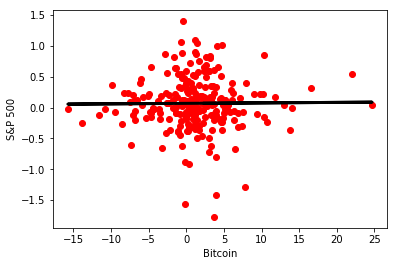

In [29]:
#Bitcoin
reg = linear_model.LinearRegression()
x_bitcoin=np.array([merge['Bitcoin - % Change']]).reshape((rows,1))
y_sp500=np.array([merge['S&P 500 - % Change']]).reshape((rows,1))
reg.fit(x_bitcoin,y_sp500)
plt.scatter(x_bitcoin,y_sp500,color='red')
plt.plot(x_bitcoin,reg.predict(x_bitcoin),color='black',linewidth=3)
plt.subplot().set_xlabel('Bitcoin')
plt.subplot().set_ylabel('S&P 500')
print('Bitcoin vs. S&P 500\nY-intercept = ',reg.intercept_,'\n',
'Coefficient = ',reg.coef_,'\n',
'R-squared = ',reg.score(x_bitcoin,y_sp500),'\n',
'Mean Squared Error = ',mean_squared_error(x_bitcoin,y_sp500), sep='')

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Gold vs. S&P 500
Y-intercept = [0.07449507]
Coefficient = [[-0.18255309]]
R-squared = 0.08771527190485073
Mean Squared Error = 0.8454747462017874


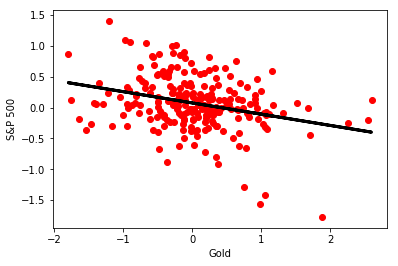

In [30]:
#Gold
reg = linear_model.LinearRegression()
x_gold=np.array([merge['Gold - % Change']]).reshape((rows,1))
y_sp500=np.array([merge['S&P 500 - % Change']]).reshape((rows,1))
reg.fit(x_gold,y_sp500)
plt.scatter(x_gold,y_sp500,color='red')
plt.plot(x_gold,reg.predict(x_gold),color='black',linewidth=3)
plt.subplot().set_xlabel('Gold')
plt.subplot().set_ylabel('S&P 500')
print('Gold vs. S&P 500\nY-intercept = ',reg.intercept_,'\n',
'Coefficient = ',reg.coef_,'\n',
'R-squared = ',reg.score(x_gold,y_sp500),'\n',
'Mean Squared Error = ',mean_squared_error(x_gold,y_sp500), sep='')

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Treasury vs. S&P 500
Y-intercept = [0.06483858]
Coefficient = [[0.01849304]]
R-squared = 0.09138129340353605
Mean Squared Error = 47.49804044668675


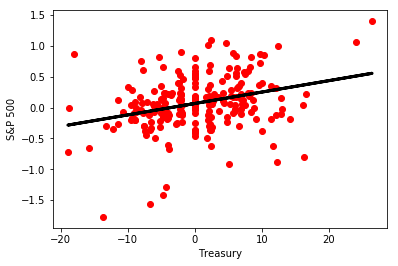

In [31]:
#Treasury
reg = linear_model.LinearRegression()
x_treasury=np.array([merge['Treasury - % Change']]).reshape((rows,1))
y_sp500=np.array([merge['S&P 500 - % Change']]).reshape((rows,1))
reg.fit(x_treasury,y_sp500)
plt.scatter(x_treasury,y_sp500,color='red')
plt.plot(x_treasury,reg.predict(x_treasury),color='black',linewidth=3)
plt.subplot().set_xlabel('Treasury')
plt.subplot().set_ylabel('S&P 500')
print('Treasury vs. S&P 500\nY-intercept = ',reg.intercept_,'\n',
'Coefficient = ',reg.coef_,'\n',
'R-squared = ',reg.score(x_treasury,y_sp500),'\n',
'Mean Squared Error = ',mean_squared_error(x_treasury,y_sp500), sep='')

In [32]:
## #4 - Summary
# Amazon vs. SP500: Coefficient = [[0.12914962]]
# Oil vs. SP500: Coefficient = [[0.01619891]]
# Bitcoin vs. SP500: Coefficient = [[0.0007743]]
# Gold vs. SP500:  Coefficient = [[-0.18255309]]
# Treasury vs. SP500: Coefficient = [[0.01849304]]
# Conclusion: 
# Gold is most correlated to the S&P 500 (negatively)
# Amazon is most positively correlated to the S&P 500
# Bitcoin is least correlated to the S&P 500

In [51]:
## #5 - Bonus
x_amazon_log = np.log(x_amazon/100+1)#taking log transformation of x
x_oil_log=np.log(x_oil/100+1)
x_bitcoin_log=np.log(x_bitcoin/100+1)
x_gold_log=np.log(x_gold/100+1)
x_treasury_log=np.log(x_treasury/100+1)

y_sp500_log = np.log(y_sp500/100+1)#taking log transformation of y

Amazon vs. S&P 500
Y-intercept = [0.00045409]
Coefficient = [[0.13416624]]
R-squared = 0.16516184661680988
Mean Squared Error = 0.00014279630985665942


Text(0,0.5,'S&P 500')

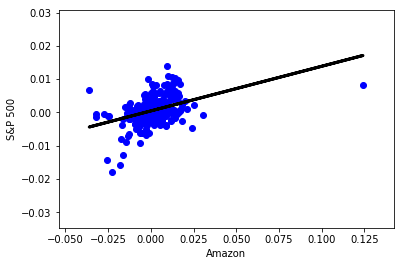

In [52]:
## Natural log regression lg(SP500%Change+1)=a*lg(Asset%Change+1)+b
# Amazon:
reg.fit(x_amazon_log,y_sp500_log)
b = reg.intercept_#intercept
m = reg.coef_#reg coefficient
print('Amazon vs. S&P 500\nY-intercept = ',reg.intercept_,'\n',
'Coefficient = ',reg.coef_,'\n',
'R-squared = ',reg.score(x_amazon_log,y_sp500_log),'\n',
'Mean Squared Error = ',mean_squared_error(x_amazon_log,y_sp500_log), sep='')
plt.scatter(x_amazon_log,y_sp500_log,color='blue')#Scatterplot
plt.plot(x_amazon_log,reg.predict(x_amazon_log),color='black',linewidth=3)
plt.xlabel('Amazon')
plt.ylabel('S&P 500')

Oil vs. S&P 500
Y-intercept = [0.00066309]
Coefficient = [[0.01601397]]
R-squared = 0.002095691122200205
Mean Squared Error = 0.0001638813765448757


Text(0,0.5,'S&P 500')

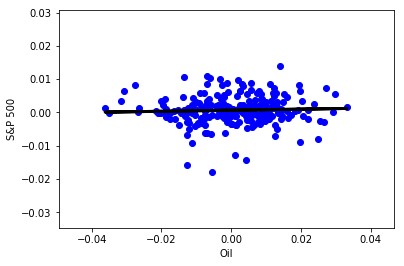

In [54]:
# Oil:
reg.fit(x_oil_log,y_sp500_log)
print('Oil vs. S&P 500\nY-intercept = ',reg.intercept_,'\n',
'Coefficient = ',reg.coef_,'\n',
'R-squared = ',reg.score(x_oil_log,y_sp500_log),'\n',
'Mean Squared Error = ',mean_squared_error(x_oil_log,y_sp500_log), sep='')
plt.scatter(x_oil_log,y_sp500_log,color='blue')#Scatterplot
plt.plot(x_oil_log,reg.predict(x_oil_log),color='black',linewidth=3)
plt.xlabel('Oil')
plt.ylabel('S&P 500')

Bitcoin vs. S&P 500
Y-intercept = [0.00066553]
Coefficient = [[0.00083754]]
R-squared = 9.429590744225447e-05
Mean Squared Error = 0.002573509176136406


Text(0,0.5,'S&P 500')

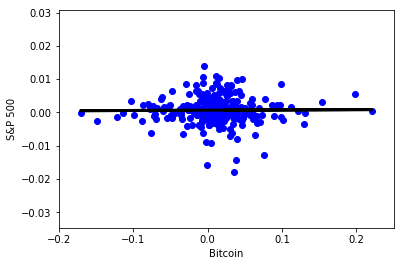

In [55]:
# Bitcoin:
reg.fit(x_bitcoin_log,y_sp500_log)
print('Bitcoin vs. S&P 500\nY-intercept = ',reg.intercept_,'\n',
'Coefficient = ',reg.coef_,'\n',
'R-squared = ',reg.score(x_bitcoin_log,y_sp500_log),'\n',
'Mean Squared Error = ',mean_squared_error(x_bitcoin_log,y_sp500_log), sep='')
plt.scatter(x_bitcoin_log,y_sp500_log,color='blue')#Scatterplot
plt.plot(x_bitcoin_log,reg.predict(x_bitcoin_log),color='black',linewidth=3)
plt.xlabel('Bitcoin')
plt.ylabel('S&P 500')

Gold vs. S&P 500
Y-intercept = [0.00073117]
Coefficient = [[-0.18274658]]
R-squared = 0.08758002150954403
Mean Squared Error = 8.438418328060045e-05


Text(0,0.5,'S&P 500')

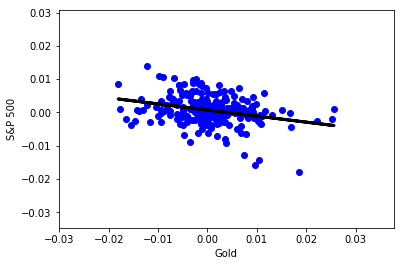

In [56]:
# Gold:
reg.fit(x_gold_log,y_sp500_log)
print('Gold vs. S&P 500\nY-intercept = ',reg.intercept_,'\n',
'Coefficient = ',reg.coef_,'\n',
'R-squared = ',reg.score(x_gold_log,y_sp500_log),'\n',
'Mean Squared Error = ',mean_squared_error(x_gold_log,y_sp500_log), sep='')
plt.scatter(x_gold_log,y_sp500_log,color='blue')#Scatterplot
plt.plot(x_gold_log,reg.predict(x_gold_log),color='black',linewidth=3)
plt.xlabel('Gold')
plt.ylabel('S&P 500')

Treasury vs. S&P 500
Y-intercept = [0.000684]
Coefficient = [[0.01855459]]
R-squared = 0.09090892739200196
Mean Squared Error = 0.0046963544490037515


Text(0,0.5,'S&P 500')

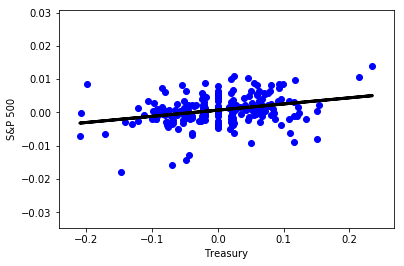

In [57]:
# Treasury:
reg.fit(x_treasury_log,y_sp500_log)
print('Treasury vs. S&P 500\nY-intercept = ',reg.intercept_,'\n',
'Coefficient = ',reg.coef_,'\n',
'R-squared = ',reg.score(x_treasury_log,y_sp500_log),'\n',
'Mean Squared Error = ',mean_squared_error(x_treasury_log,y_sp500_log), sep='')
plt.scatter(x_treasury_log,y_sp500_log,color='blue')#Scatterplot
plt.plot(x_treasury_log,reg.predict(x_treasury_log),color='black',linewidth=3)
plt.xlabel('Treasury')
plt.ylabel('S&P 500')